# Try to map the shops on USA map

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import geopandas
import geopy.distance
import math

#from shapely.geometry import Point
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'geopy'

In [3]:
states = geopandas.read_file("../Data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp")
states = states[states["NAME"] != "Alaska"]
states = states[states["NAME"] != "Hawaii"]
states = states[states["NAME"] != "Puerto Rico"]

NameError: name 'geopandas' is not defined

In [5]:
states.head()

NameError: name 'states' is not defined

In [6]:
states = states.to_crs("EPSG:3395")

NameError: name 'states' is not defined

In [7]:
states.plot()

NameError: name 'states' is not defined

## Importing chipotle

In [4]:
chipotle = pd.read_csv("../Data/chipotle_stores.csv")
chipotle.head(10)

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
5,Alabama,Hoover,"1759 Montgomery Hwy Hoover, AL 35244 US",33.378958,-86.803802
6,Alabama,Huntsville,"5900 University Dr NW Ste D2 Huntsville, AL 35...",34.742319,-86.665720
7,Alabama,Mobile,"3871 Airport Blvd Mobile, AL 36608 US",30.675338,-88.143754
8,Alabama,Mobile,"7765 Airport Blvd D100 Mobile, AL 36608 US",30.682731,-88.224998
9,Alabama,Montgomery,"2560 Berryhill Rd Ste C Montgomery, AL 36117 US",32.359177,-86.162253


In [9]:
chipotle.isnull().sum()

state        0
location     0
address      0
latitude     0
longitude    0
dtype: int64

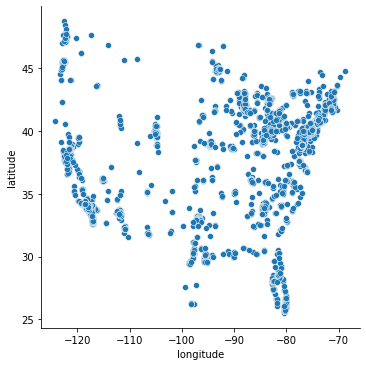

In [10]:
sns.relplot(data=chipotle, x="longitude", y="latitude")

In [11]:
chipotle.longitude.max()

-68.75374996916833

In [12]:
gdf = geopandas.GeoDataFrame(
    geometry=geopandas.points_from_xy(chipotle.longitude, chipotle.latitude))

NameError: name 'geopandas' is not defined

In [ ]:
gdf.head(10)

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

states.plot(ax = ax, edgecolor='black', color='white')

gdf.plot(ax=ax, color='red', alpha = 0.5)

plt.show()

NameError: name 'states' is not defined

#### Clustering

In [5]:
X=chipotle.loc[:,['latitude','longitude']]
X

,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220
...,...,...
2624,42.565892,-87.921048
2625,43.067723,-88.048222
2626,46.904247,-96.796618
2627,46.855337,-96.861416


In [16]:
n_cluster = len(chipotle["state"].unique())

In [6]:
id_n=37
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_

In [7]:
#Getting the clusters center
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[  40.66816482,  -82.19180556],
       [  33.31917758, -111.88437399],
       [  32.87051306,  -96.92730487],
       [  37.12118003, -119.92359578],
       [  28.55000788,  -81.85864013],
       [  40.54419945,  -74.37412777],
       [  41.95613798,  -87.94666942],
       [  45.04610302, -122.70093045],
       [  33.86049366, -117.93630451],
       [  39.64634512, -105.04530226],
       [  34.16312606,  -84.06132215],
       [  45.0274582 ,  -93.35127972],
       [  39.57166134,  -94.86362838],
       [  42.42896787,  -71.14883824],
       [  38.79772342,  -76.98762119],
       [  29.70795566,  -98.03602302],
       [  35.70774433,  -79.60046719],
       [  39.41200368,  -84.84184896],
       [  26.24309957,  -80.42651427],
       [  34.94951263,  -90.68363633],
       [  29.97121219,  -95.38035195],
       [  36.06639951, -115.03324929],
       [  41.55512899, -111.53544455],
       [  40.66683732,  -79.98655365],
       [  33.36420883, -105.05868857],
       [  36.55309202,  -

In [8]:
cluster_centroids = pd.DataFrame(cluster_centers, columns=["latitude_centroid","longitude_centroid"])
cluster_centroids

,latitude_centroid,longitude_centroid
0,40.668165,-82.191806
1,33.319178,-111.884374
2,32.870513,-96.927305
3,37.121180,-119.923596
4,28.550008,-81.858640
5,40.544199,-74.374128
6,41.956138,-87.946669
7,45.046103,-122.700930
8,33.860494,-117.936305
9,39.646345,-105.045302


In [9]:
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
chipotle_clusters = chipotle.join(cluster_labels.to_frame())
chipotle_clusters

,state,location,address,latitude,longitude,cluster
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,30
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,30
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,30
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,30
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,36
...,...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048,6
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222,6
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618,11
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416,11


In [11]:
colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

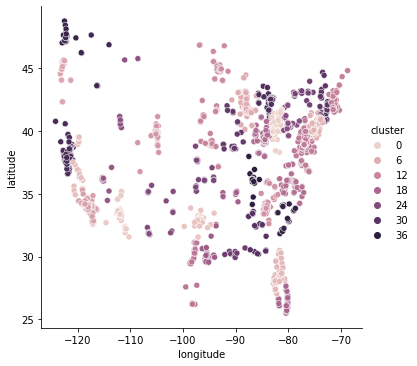

In [13]:
sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster")

In [15]:
chipotle_clusters["count"] = chipotle_clusters.groupby("cluster")["location"].count()

cluster
0     123
1      83
2      98
3      26
4      95
5     234
6     170
7      36
8     257
9      81
10     67
11     75
12     61
13     79
14    236
15     50
16     70
17    102
18     74
19      9
20     67
21     27
22     12
23     39
24     21
25     24
26     23
27     10
28     25
29     59
30     22
31     47
32    143
33      6
34     38
35     21
36     19
Name: location, dtype: int64

In [35]:
print(cluster_centroids.iloc[33])
chipotle_clusters[chipotle_clusters["cluster"] == 33]

latitude_centroid      44.845463
longitude_centroid   -116.095495
Name: 33, dtype: float64


,state,location,address,latitude,longitude,cluster
877,Idaho,Boise,"205 N Milwaukee St Boise, ID 83704 US",43.606686,-116.282300,33
878,Idaho,Boise,"305 S 6th St Boise, ID 83702 US",43.612668,-116.203094,33
879,Idaho,Boise,"7610 W State Street Suite 110 Boise, ID 83714 US",43.671261,-116.283033,33
880,Idaho,Meridian,"2126 N Eagle Rd Ste 100 Meridian, ID 83646 US",43.624164,-116.353787,33
1450,Montana,Missoula,"2995 N Reserve St Ste A&B Missoula, MT 59808 US",46.892179,-114.040016,33
2569,Washington,Spokane,"930 N Division St Spokane, WA 99202 US",47.665820,-117.410736,33


In [32]:
max_distance_list = []

for i in range(37):
    latitude_centroide = cluster_centroids.iloc[i][0]
    longitude_centroide = cluster_centroids.iloc[i][1]

    centroide = (latitude_centroide, longitude_centroide)

    working_df = chipotle_clusters[chipotle_clusters["cluster"] == i][["latitude", "longitude"]]

    max_distance = 0
    for j in range(working_df.shape[0]):
        latitude = working_df.iloc[j][0]
        longitude = working_df.iloc[j][1]

        point = (latitude, longitude)

        distance = geopy.distance.vincenty(centroide, point).km

        if distance > max_distance:
            max_distance = distance
    
    max_distance_list += [max_distance]

print(max_distance_list)

[2.3967656007291014, 2.786421778118712, 2.8997220767398164, 2.421540181096639, 1.9440430625497591, 1.6267455001832007, 2.824684242780985, 2.741927627088798, 2.0150138843248637, 4.232038677326771, 2.2165514489334677, 3.957549317131884, 3.232515347276551, 3.3909159781770364, 2.2619053177175332, 3.5354415728852, 2.5867365171819388, 1.7525928876094372, 1.5623000258095334, 1.7403653828290437, 3.0733289651334905, 1.8110616797390462, 5.172858529266026, 2.133430772401914, 3.6765423675990627, 2.4786129642043035, 2.0027443055197702, 1.9812493115968974, 2.7784021602090263, 2.9871243664604576, 2.2176507106436523, 2.030602746738339, 3.635473165868222, 3.1119568537423237, 3.1572516235035026, 1.9836562040673715, 2.0541727930953746]


In [ ]:
def area_circle(list):
    return [math.pi * i ** 2 for i in list]

areas = area_circle(max_distance_list)

In [ ]:
df_area = pd.DataFrame(areas)
cluster_centroids = cluster_centroids.join(df_area)

cluster_centroids["shop_area_density"] = cluster_centroids["count"] / cluster_centroids["area"]